In [1]:
# 这个code block主要是用来检查包和库的安装是不是完全，和requirements.txt中的区别在于多了一些作者认为比较常见的库
# 我在运行这一步的时候，安装了cupy-cuda92等
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
import torch
%matplotlib inline
from pylab import mpl
mpl.rcParams['figure.dpi'] = 600  # 设置matplotlib可以显示汉语

D:\课程\博一下\图像处理实验\目标检测\simple-faster-rcnn-pytorch-master\model\utils\nms\non_maximum_suppression.py:12: UserWarning: 
    the python code for non_maximum_suppression is about 2x slow
    It is strongly recommended to build cython code: 
    `cd model/utils/nms/; python3 build.py build_ext --inplace
  `cd model/utils/nms/; python3 build.py build_ext --inplace''')


成功装载预训练模型VGG16！


Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.
..\torch\csrc\autograd\python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


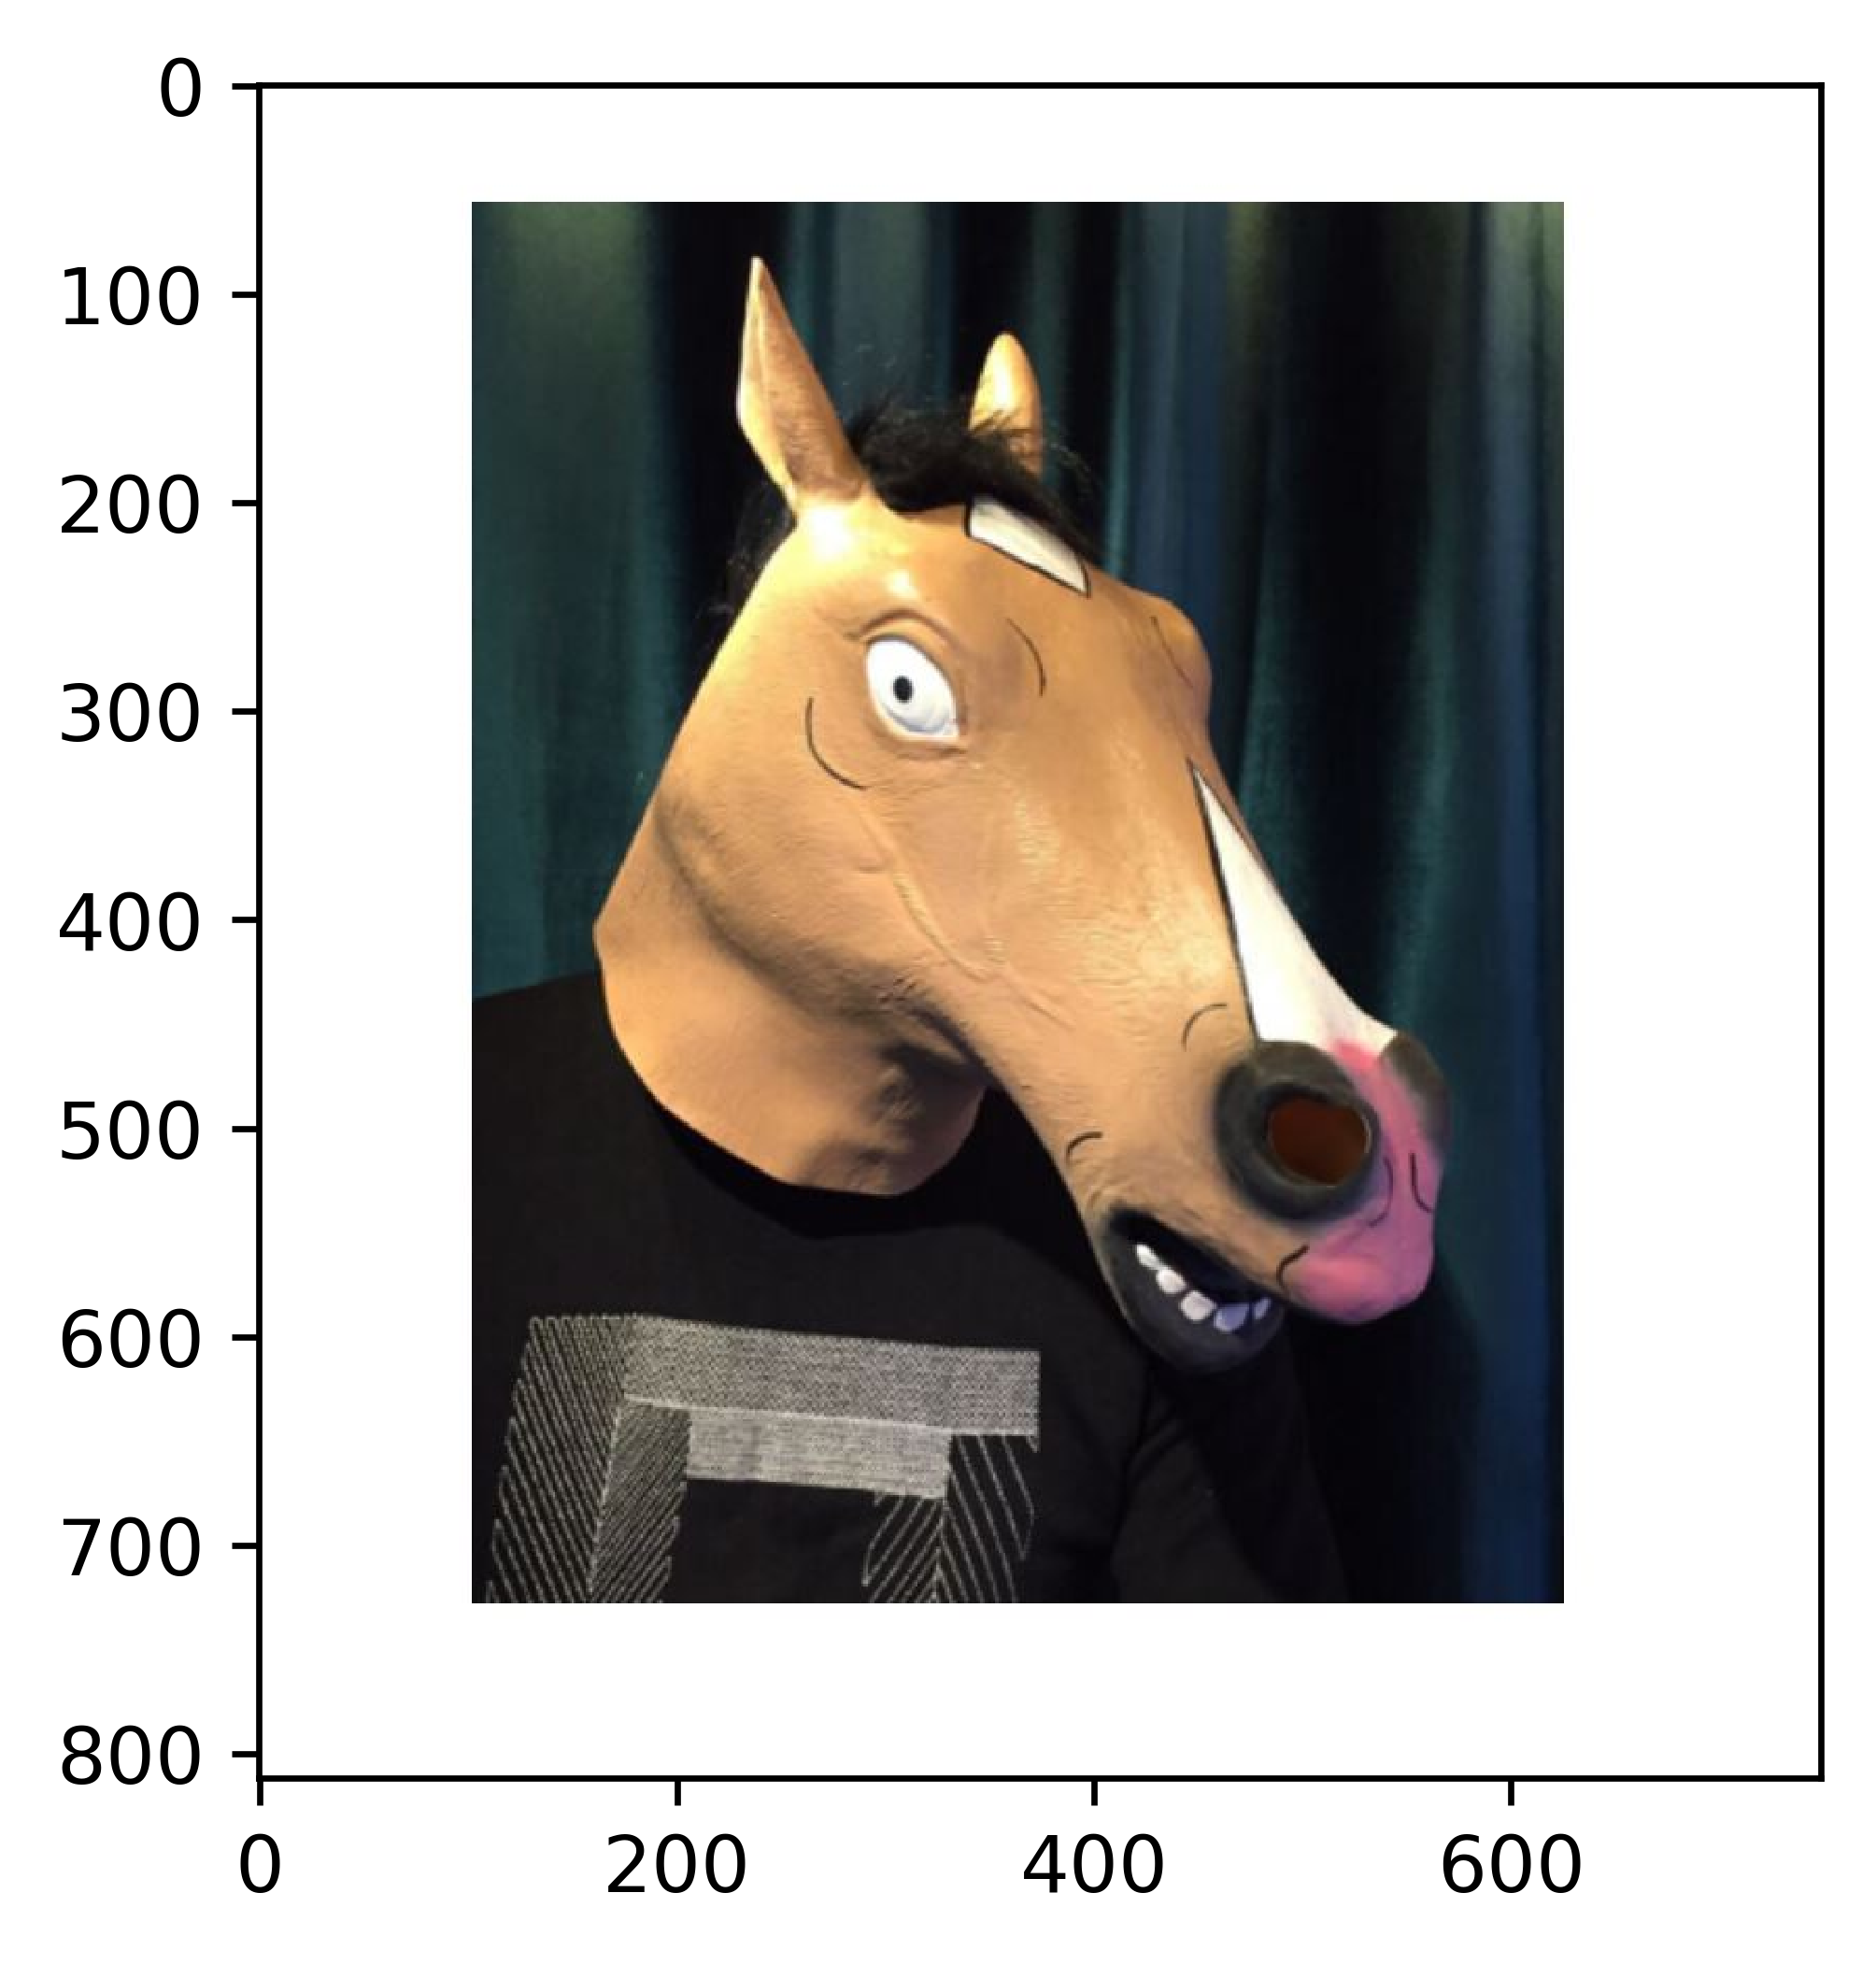

In [9]:
path = r"D:\课程\博一下\图像处理实验\目标检测\YOLOV3-master\data\test\cosplay2.jpg"
torch.cuda.empty_cache() # 清空一下GPU缓存
# 加载预训练模型
faster_rcnn = FasterRCNNVGG16()
print("成功装载预训练模型VGG16！")
trainer = FasterRCNNTrainer(faster_rcnn).cuda()
trainer.load('./三种不同finetuing的模型/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
# 这加载测试图像，传的参数就是待测试的图像相对路径
img = read_image(path)
img = t.from_numpy(img)[None]
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))